In [17]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(stringr)
library(Sierra)
library(presto)
library(ggplot2)
library(msigdbr)
library(fgsea)
library(Seurat)
library(tidyverse)
setwd('/data/APAproject/post_qual/data/Nagy_mdd/')

In [11]:
## correct the barcode and gene name file formats
# bc = read.table('GSE144136_CellNames.csv', sep=',', header = T)
# bc = data.frame(bc$x)
# write.table(bc, file='barcodes.tsv', quote = F, row.names = F, col.names = F)

In [12]:
## correct the barcode and gene name file formats
# bc = read.table('GSE144136_GeneNames.csv', sep=',', header = T)
# bc = data.frame(bc$x)
# write.table(bc, file='genes.tsv', quote = F, row.names = F, col.names = F)

In [2]:
ge_so <- Read10X(data.dir = "count_matrices/mtx/", gene.column=1)
ge_so = CreateSeuratObject(counts = ge_so)
ge_so

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


An object of class Seurat 
30062 features across 78886 samples within 1 assay 
Active assay: RNA (30062 features, 0 variable features)

In [5]:
ge_so@assays$RNA@

   [[ suppressing 32 column names 'Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA', 'Inhib_5.3_Control_B3_AAACCTGCAAACTGTC', 'Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT' ... ]]

   [[ suppressing 32 column names 'Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA', 'Inhib_5.3_Control_B3_AAACCTGCAAACTGTC', 'Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT' ... ]]

   [[ suppressing 32 column names 'Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA', 'Inhib_5.3_Control_B3_AAACCTGCAAACTGTC', 'Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT' ... ]]



30062 x 78886 sparse Matrix of class "dgCMatrix"
                                                                                             
RP11-34P13.3  RP11-34P13.3         . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
RP11-34P13.7  RP11-34P13.7         . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
RP11-34P13.14  RP11-34P13.14       . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
FO538757.3  FO538757.3             . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
FO538757.2  FO538757.2             1 1 1  . . . 1 1 . . . 1 . 1 . . 2 . 2 1 . . . . 2 . . . 2
AP006222.2  AP006222.2             . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
RP5-857K21.15  RP5-857K21.15       . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
RP4-669L17.2  RP4-669L17.2         . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
RP4-669L17.10  RP4-669L17.10       . . .  . . . . . . . . . . . . . . . . . . . . . . . . . .
RP5-857K21.

In [84]:
## make the metadata yourself :/ ##
info <- data.frame('cellname'= Cells(ge_so))
info$cellname
## you know what? do this part with the pyhton in generalBS part

cellname
<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT
Mix_2.3_Control_B3_AAACGGGAGGAACTGC
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT
Astros_3.3_Control_B3_AAACGGGCATCCAACA


In [40]:
library(stringr)
tst <- str_split('Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA', "\\.", n = Inf, simplify = T)
tst[[1]]

[1] "Ex_10_L2_4"

In [85]:
info[['batch']] = 'non'
info[['batchCond']] = 'non'
info[['cluster']] = 'non'
info[['barcode']] = 'non'

In [86]:
for (i in 1:nrow(info)){
    str <- as.character(info[i,'cellname'])
    str_sp <- str_split(str, "_", n = Inf, simplify = T)
    barcode <- str_sp[[length(str_sp)]]
    batch <- str_sp[[length(str_sp)-1]]
    batchCond <- str_sp[[length(str_sp)-2]]
    str_sp2 <- str_split(str, "\\.", n = Inf, simplify = T)
    cluster <- str_sp2[[1]]
    info[i,'batch'] <- batch
    info[i,'batchCond'] <- batchCond
    info[i,'cluster'] <- cluster
    info[i,'barcode'] <- barcode
}

In [97]:
info

cellname,batch,batchCond,cluster,barcode,cellType
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,B3,Control,Ex_10_L2_4,AAACCTGAGGTAGCCA,K
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,B3,Control,Inhib_5,AAACCTGCAAACTGTC,K
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,B3,Control,Ex_10_L2_4,AAACCTGCAACAACCT,K
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,B3,Control,Ex_8_L5_6,AAACCTGGTCCGAACC,K
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,B3,Control,Inhib_2_VIP,AAACCTGGTCGTGGCT,K
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,B3,Control,Mix_2,AAACGGGAGGAACTGC,K
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,B3,Control,Oligos_3,AAACGGGAGTGGTAGC,K
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,B3,Control,Ex_7_L4_6,AAACGGGAGTGTGAAT,K
Astros_3.3_Control_B3_AAACGGGCATCCAACA,B3,Control,Astros_3,AAACGGGCATCCAACA,Astrocyte


In [54]:
table(info['batch'])


   B1    B2    B3    B4    B5    B6 
 5371  4376 15011 20296 17267 16565 

In [94]:
unique(info['cluster'])

,cluster
,<chr>
1,Ex_10_L2_4
2,Inhib_5
4,Ex_8_L5_6
5,Inhib_2_VIP
6,Mix_2
7,Oligos_3
8,Ex_7_L4_6
9,Astros_3
10,Ex_5_L5


cellname,batch,batchCond,cluster,barcode,cellType
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,B3,Control,Ex_10_L2_4,AAACCTGAGGTAGCCA,K
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,B3,Control,Inhib_5,AAACCTGCAAACTGTC,K
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,B3,Control,Ex_10_L2_4,AAACCTGCAACAACCT,K
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,B3,Control,Ex_8_L5_6,AAACCTGGTCCGAACC,K
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,B3,Control,Inhib_2_VIP,AAACCTGGTCGTGGCT,K
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,B3,Control,Mix_2,AAACGGGAGGAACTGC,K
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,B3,Control,Oligos_3,AAACGGGAGTGGTAGC,K
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,B3,Control,Ex_7_L4_6,AAACGGGAGTGTGAAT,K
Astros_3.3_Control_B3_AAACGGGCATCCAACA,B3,Control,Astros_3,AAACGGGCATCCAACA,Astrocyte


In [98]:
tstinfo <- info[info['cluster']=='non',]
tstinfo

,cellname,batch,batchCond,cluster,barcode,cellType
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
40465,Ex_3_L4_5.1_Suicide_B5_AAGACCTTCCAATGGT,non,non,non,non,K
40466,Ex_3_L4_5.1_Suicide_B5_AAGACCTTCCTGCAGG,non,non,non,non,K
40467,Ex_3_L4_5.1_Suicide_B5_AAGCCGCAGGACGAAA,non,non,non,non,K
40468,Mix_2.1_Suicide_B5_AAGCCGCAGGTGCAAC,non,non,non,non,K
40469,OPCs_1.1_Suicide_B5_AAGCCGCGTTCAGACT,non,non,non,non,K
40470,Ex_6_L4_6.1_Suicide_B5_AAGCCGCTCAGCGATT,non,non,non,non,K
40471,Ex_6_L4_6.1_Suicide_B5_AAGCCGCTCCGGGTGT,non,non,non,non,K
40472,Ex_2_L5.1_Suicide_B5_AAGCCGCTCCTTGCCA,non,non,non,non,K
40473,Inhib_6_SST.1_Suicide_B5_AAGGAGCAGCGTGTCC,non,non,non,non,K


In [99]:
for (i in 1:nrow(tstinfo)){
    str <- as.character(tstinfo[i,'cellname'])
    str_sp <- str_split(str, "_", n = Inf, simplify = T)
    barcode <- str_sp[[length(str_sp)]]
    batch <- str_sp[[length(str_sp)-1]]
    batchCond <- str_sp[[length(str_sp)-2]]
    str_sp2 <- str_split(str, "\\.", n = Inf, simplify = T)
    cluster <- str_sp2[[1]]
    tstinfo[i,'batch'] <- batch
    tstinfo[i,'batchCond'] <- batchCond
    tstinfo[i,'cluster'] <- cluster
    tstinfo[i,'barcode'] <- barcode
}
tstinfo

,cellname,batch,batchCond,cluster,barcode,cellType
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
40465,Ex_3_L4_5.1_Suicide_B5_AAGACCTTCCAATGGT,B5,Suicide,Ex_3_L4_5,AAGACCTTCCAATGGT,K
40466,Ex_3_L4_5.1_Suicide_B5_AAGACCTTCCTGCAGG,B5,Suicide,Ex_3_L4_5,AAGACCTTCCTGCAGG,K
40467,Ex_3_L4_5.1_Suicide_B5_AAGCCGCAGGACGAAA,B5,Suicide,Ex_3_L4_5,AAGCCGCAGGACGAAA,K
40468,Mix_2.1_Suicide_B5_AAGCCGCAGGTGCAAC,B5,Suicide,Mix_2,AAGCCGCAGGTGCAAC,K
40469,OPCs_1.1_Suicide_B5_AAGCCGCGTTCAGACT,B5,Suicide,OPCs_1,AAGCCGCGTTCAGACT,K
40470,Ex_6_L4_6.1_Suicide_B5_AAGCCGCTCAGCGATT,B5,Suicide,Ex_6_L4_6,AAGCCGCTCAGCGATT,K
40471,Ex_6_L4_6.1_Suicide_B5_AAGCCGCTCCGGGTGT,B5,Suicide,Ex_6_L4_6,AAGCCGCTCCGGGTGT,K
40472,Ex_2_L5.1_Suicide_B5_AAGCCGCTCCTTGCCA,B5,Suicide,Ex_2_L5,AAGCCGCTCCTTGCCA,K
40473,Inhib_6_SST.1_Suicide_B5_AAGGAGCAGCGTGTCC,B5,Suicide,Inhib_6_SST,AAGGAGCAGCGTGTCC,K


In [100]:
## don't know wtf is happening but whatever lets rbind the two dfs and call it a day

In [101]:
tstinfo1 <- info[info['cluster']!='non',]

In [102]:
last_info <- rbind(tstinfo1, tstinfo)
table(last_info['cluster'])


     Astros_1      Astros_2      Astros_3          Endo     Ex_1_L5_6 
          234          2729          1094           340           732 
   Ex_10_L2_4       Ex_2_L5     Ex_3_L4_5      Ex_4_L_6       Ex_5_L5 
        23517          2120          5919           617          3663 
    Ex_6_L4_6     Ex_7_L4_6     Ex_8_L5_6     Ex_9_L5_6       Inhib_1 
         2470          3810          1890           238          2066 
  Inhib_2_VIP   Inhib_3_SST   Inhib_4_SST       Inhib_5   Inhib_6_SST 
         4197           883           191          3255          2118 
Inhib_7_PVALB Inhib_8_PVALB   Micro/Macro         Mix_1         Mix_2 
         1227           670          1327           250          2271 
        Mix_3         Mix_4         Mix_5      Oligos_1      Oligos_2 
          416           544          1941           303            48 
     Oligos_3        OPCs_1        OPCs_2 
         5543          1773           490 

In [104]:
## ok it seems its all right now

In [114]:
last_info['cellType'] = 'K'
last_info[which(startsWith(x = last_info$cluster, 'Astros')), 'cellType'] = "Astrocyte"
last_info[which(startsWith(x = last_info$cluster, 'Oligos')), 'cellType'] = "Oligodendrocytes"
last_info[which(startsWith(x = last_info$cluster, 'OPCs')), 'cellType'] = "OPCs"
last_info[which(startsWith(x = last_info$cluster, 'Mix')), 'cellType'] = "Mix"
last_info[which(startsWith(x = last_info$cluster, 'Endo')), 'cellType'] = "Endothelial"
last_info[which(startsWith(x = last_info$cluster, 'Micro')), 'cellType'] = "Microglia/Macrophages"
last_info[which(startsWith(x = last_info$cluster, 'Inhib')), 'cellType'] = "Inhibitory"
last_info[which(endsWith(last_info$cluster, 'SST')), 'cellType'] = "Inhibitory_SST"
last_info[which(endsWith(last_info$cluster, 'PVALB')), 'cellType'] = "Inhibitory_PVALB"
last_info[which(endsWith(last_info$cluster, 'VIP')), 'cellType'] = "Inhibitory_VIP"
last_info[which(endsWith(last_info$cluster, 'L5_6')), 'cellType'] = "Excitatory_L5-6"
last_info[which(endsWith(last_info$cluster, 'L4_6')), 'cellType'] = "Excitatory_L4-6"
last_info[which(endsWith(last_info$cluster, 'L5')), 'cellType'] = "Excitatory_L5"
last_info[which(endsWith(last_info$cluster, 'L6')), 'cellType'] = "Excitatory_L6"
last_info[which(endsWith(last_info$cluster, 'L4_5')), 'cellType'] = "Excitatory_L4-5"
last_info[which(endsWith(last_info$cluster, 'L2_4')), 'cellType'] = "Excitatory_L2-4"

In [115]:
table(last_info['cellType'])


            Astrocyte           Endothelial       Excitatory_L2-4 
                 4057                   340                 23517 
      Excitatory_L4-5       Excitatory_L4-6         Excitatory_L5 
                 5919                  6280                  5783 
      Excitatory_L5-6            Inhibitory      Inhibitory_PVALB 
                 2860                  5321                  1897 
       Inhibitory_SST        Inhibitory_VIP                     K 
                 3192                  4197                   617 
Microglia/Macrophages                   Mix      Oligodendrocytes 
                 1327                  5422                  5894 
                 OPCs 
                 2263 

In [118]:
ge_so

An object of class Seurat 
30062 features across 78886 samples within 1 assay 
Active assay: RNA (30062 features, 0 variable features)

In [120]:
rownames(last_info) <- last_info$cellname
last_info

,cellname,batch,batchCond,cluster,barcode,cellType
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,B3,Control,Ex_10_L2_4,AAACCTGAGGTAGCCA,Excitatory_L2-4
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,B3,Control,Inhib_5,AAACCTGCAAACTGTC,Inhibitory
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,B3,Control,Ex_10_L2_4,AAACCTGCAACAACCT,Excitatory_L2-4
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,B3,Control,Ex_8_L5_6,AAACCTGGTCCGAACC,Excitatory_L5-6
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,B3,Control,Inhib_2_VIP,AAACCTGGTCGTGGCT,Inhibitory_VIP
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,Mix_2.3_Control_B3_AAACGGGAGGAACTGC,B3,Control,Mix_2,AAACGGGAGGAACTGC,Mix
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,B3,Control,Oligos_3,AAACGGGAGTGGTAGC,Oligodendrocytes
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,B3,Control,Ex_7_L4_6,AAACGGGAGTGTGAAT,Excitatory_L4-6
Astros_3.3_Control_B3_AAACGGGCATCCAACA,Astros_3.3_Control_B3_AAACGGGCATCCAACA,B3,Control,Astros_3,AAACGGGCATCCAACA,Astrocyte


In [121]:
ge_so <- AddMetaData(ge_so, metadata = last_info)
ge_so

An object of class Seurat 
30062 features across 78886 samples within 1 assay 
Active assay: RNA (30062 features, 0 variable features)

In [122]:
process_pca <- function (so, n_features){
    so <- NormalizeData(so, normalization.method = "LogNormalize",scale.factor = 10000, verbose = F)
    so <- FindVariableFeatures(object = so,selection.method = "vst", nfeatures = n_features, verbose = F)
    so <- ScaleData(so, features = rownames(so))
    so <- RunPCA(so, features = VariableFeatures(object = so), verbose = F)
    return(so)
}

Centering and scaling data matrix



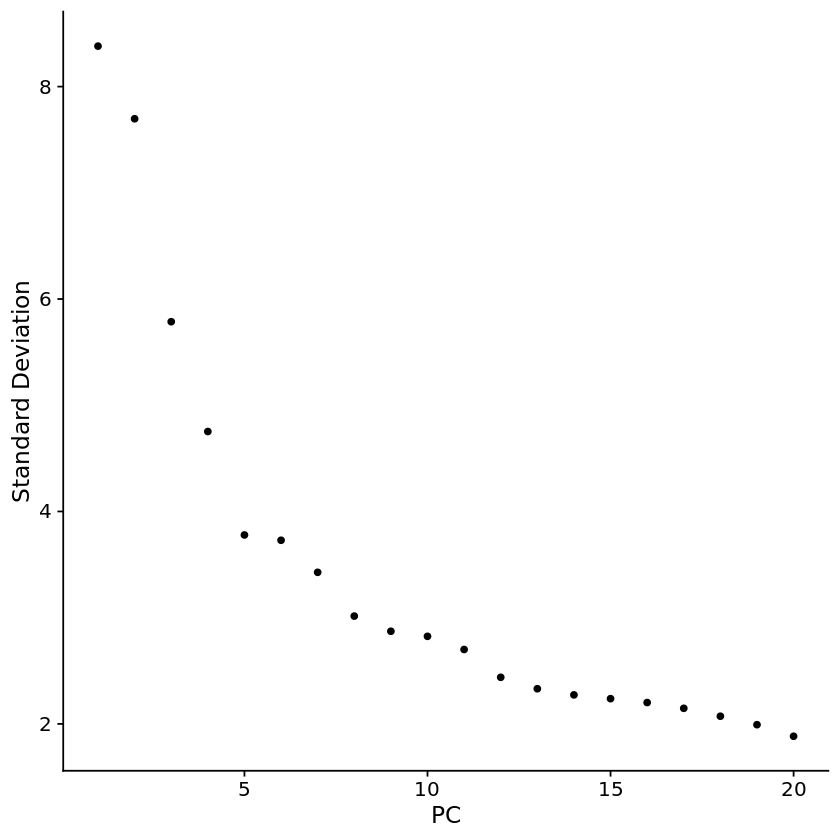

In [123]:
ge_so <- NormalizeData(ge_so, normalization.method = "LogNormalize",scale.factor = 10000, verbose = F)
ge_so <- FindVariableFeatures(object = ge_so,selection.method = "vst", nfeatures = 2000, verbose = F)
ge_so <- ScaleData(ge_so, features = rownames(ge_so))
ge_so <- RunPCA(ge_so, features = VariableFeatures(object = ge_so), verbose = F)
ElbowPlot(ge_so)

Warning message:
"The following arguments are not used: n_neighbors"
Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
23:08:02 UMAP embedding parameters a = 1.929 b = 0.7915

23:08:02 Read 78886 rows and found 20 numeric columns

23:08:02 Using Annoy for neighbor search, n_neighbors = 30

23:08:02 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:08:13 Writing NN index file to temp file /tmp/RtmpGF5s4p/file55c41ddfd719

23:08:13 Searching Annoy index using 1 thread, search_k = 3000

23:08:44 Annoy recall = 100%

23:08:47 Commencing smo

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 78886
Number of edges: 2721372

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9254
Number of communities: 38
Elapsed time: 30 seconds


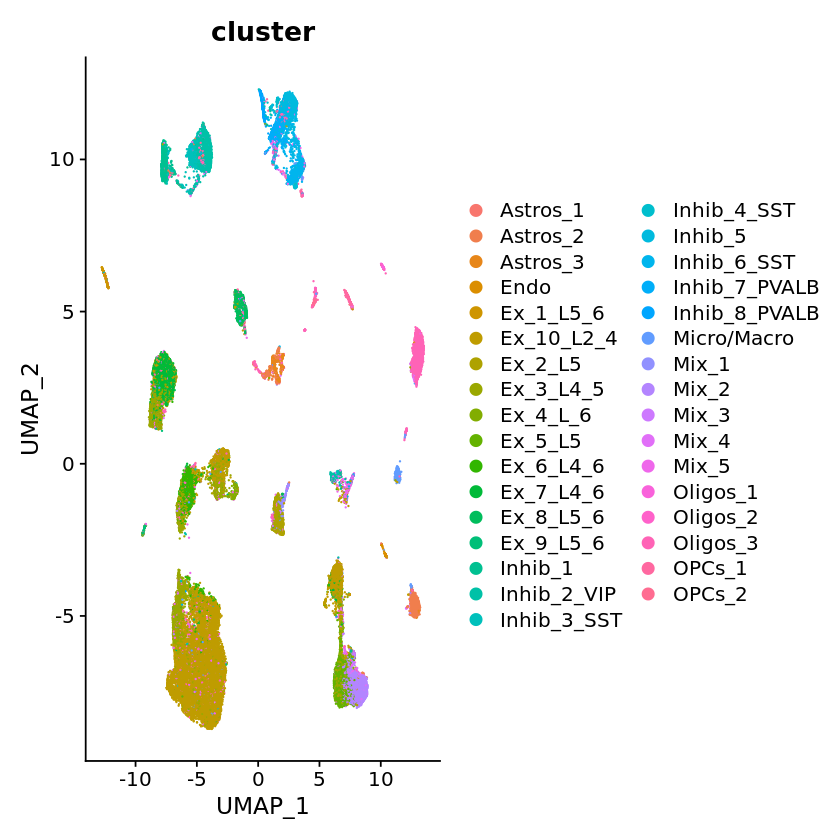

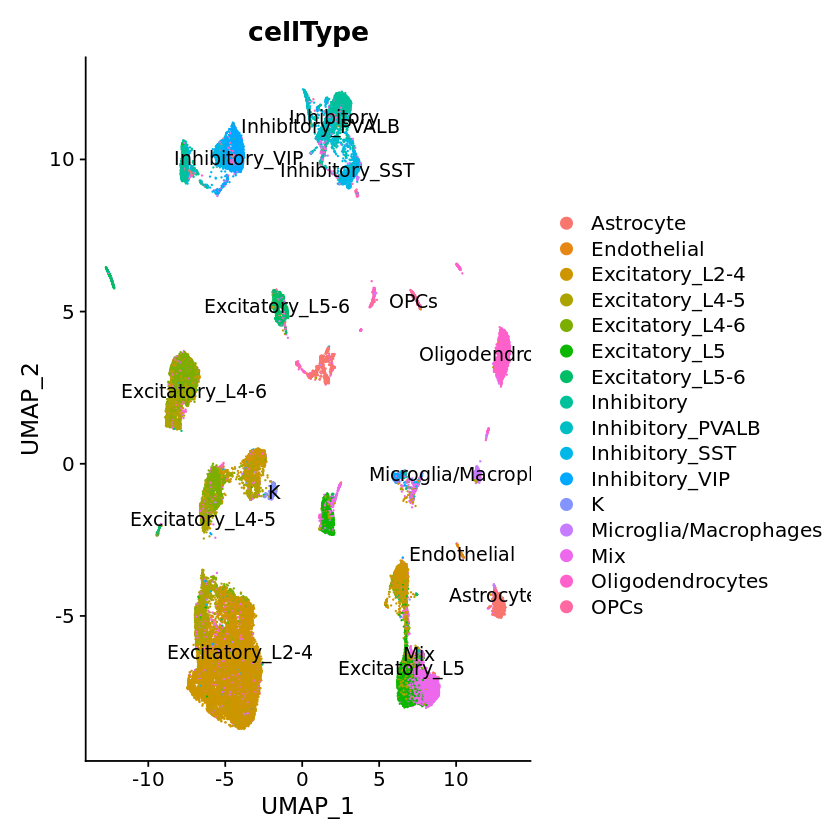

In [124]:
ge_so <- RunUMAP(ge_so , dims = 1:20, min.dist = 0.001,  n_neighbors = 50)    ##parameteres need to be set
ge_so <- FindNeighbors(ge_so, dims = 1:20)
#find cluster
ge_so <- FindClusters(ge_so, resolution =1)
DimPlot(ge_so, reduction='umap', group.by='cluster')
DimPlot(ge_so, reduction='umap', group.by='cellType', label = T)

In [125]:
## Ok I think I will pool everything together and assign the labels manually :/ 

In [126]:
last_info

,cellname,batch,batchCond,cluster,barcode,cellType
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,B3,Control,Ex_10_L2_4,AAACCTGAGGTAGCCA,Excitatory_L2-4
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,B3,Control,Inhib_5,AAACCTGCAAACTGTC,Inhibitory
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,B3,Control,Ex_10_L2_4,AAACCTGCAACAACCT,Excitatory_L2-4
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,B3,Control,Ex_8_L5_6,AAACCTGGTCCGAACC,Excitatory_L5-6
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,B3,Control,Inhib_2_VIP,AAACCTGGTCGTGGCT,Inhibitory_VIP
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,Mix_2.3_Control_B3_AAACGGGAGGAACTGC,B3,Control,Mix_2,AAACGGGAGGAACTGC,Mix
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,B3,Control,Oligos_3,AAACGGGAGTGGTAGC,Oligodendrocytes
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,B3,Control,Ex_7_L4_6,AAACGGGAGTGTGAAT,Excitatory_L4-6
Astros_3.3_Control_B3_AAACGGGCATCCAACA,Astros_3.3_Control_B3_AAACGGGCATCCAACA,B3,Control,Astros_3,AAACGGGCATCCAACA,Astrocyte


In [ ]:
last_info['sample_id'] = 'k'

In [133]:
# 
for (i in 1:nrow(last_info)){
    str <- as.character(last_info[i,'cellname'])
    str_sp <- str_split(str, "\\.", n = Inf, simplify = T)
    tmp_sample <- str_sp[[2]]
    tmps <- str_split(tmp_sample,"_",n=Inf, simplify = T)
    last_info[i,'sample_id'] = tmps[[1]]
}
last_info

,cellname,batch,batchCond,cluster,barcode,cellType,sample_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,B3,Control,Ex_10_L2_4,AAACCTGAGGTAGCCA,Excitatory_L2-4,3
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,B3,Control,Inhib_5,AAACCTGCAAACTGTC,Inhibitory,3
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,B3,Control,Ex_10_L2_4,AAACCTGCAACAACCT,Excitatory_L2-4,3
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,B3,Control,Ex_8_L5_6,AAACCTGGTCCGAACC,Excitatory_L5-6,3
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,B3,Control,Inhib_2_VIP,AAACCTGGTCGTGGCT,Inhibitory_VIP,3
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,Mix_2.3_Control_B3_AAACGGGAGGAACTGC,B3,Control,Mix_2,AAACGGGAGGAACTGC,Mix,3
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,B3,Control,Oligos_3,AAACGGGAGTGGTAGC,Oligodendrocytes,3
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,B3,Control,Ex_7_L4_6,AAACGGGAGTGTGAAT,Excitatory_L4-6,3
Astros_3.3_Control_B3_AAACGGGCATCCAACA,Astros_3.3_Control_B3_AAACGGGCATCCAACA,B3,Control,Astros_3,AAACGGGCATCCAACA,Astrocyte,3


In [134]:
table(last_info$sample_id)


   1   10   11   12   13   14   15   16   17   18   19    2   20   21   22   23 
3267 2511 3757 2511 2433 1758 3523 1239 3227 1688 2630 1795 3491 1953 2144 3007 
  24   25   26   27   28   29    3   30   31   32   33   34    4    5    6    7 
1061  212 2196 1387 2825 2461 1363 2690 3288 2523 2077 3228 2423 1661 2275 2487 
   8    9 
2561 1234 

In [135]:
ge_so <- AddMetaData(ge_so, metadata = last_info)

In [136]:
## now subset the control cells
ge_so_control <- subset(ge_so, subset=batchCond=='Control')
table(ge_so_control$sample_id)


  12   13   15   16   19    2   20   21   22   24   25   27   29    3   31    7 
2511 2433 3523 1239 2630 1795 3491 1953 2144 1061  212 1387 2461 1363 3288 2487 
   9 
1234 

In [143]:
ge_so_control <- RunPCA(ge_so_control, features = VariableFeatures(object = ge_so_control), verbose = F)
ge_so_control <- RunUMAP(ge_so_control , dims = 1:20, min.dist = 0.001,  n_neighbors = 50, verbose=F)    ##parameteres need to be set
ge_so_control <- FindNeighbors(ge_so_control, dims = 1:20, verbose=F)
#find cluster
ge_so_control <- FindClusters(ge_so_control, resolution =1, verbose=F)

Warning message:
"The following arguments are not used: n_neighbors"


png 
  2

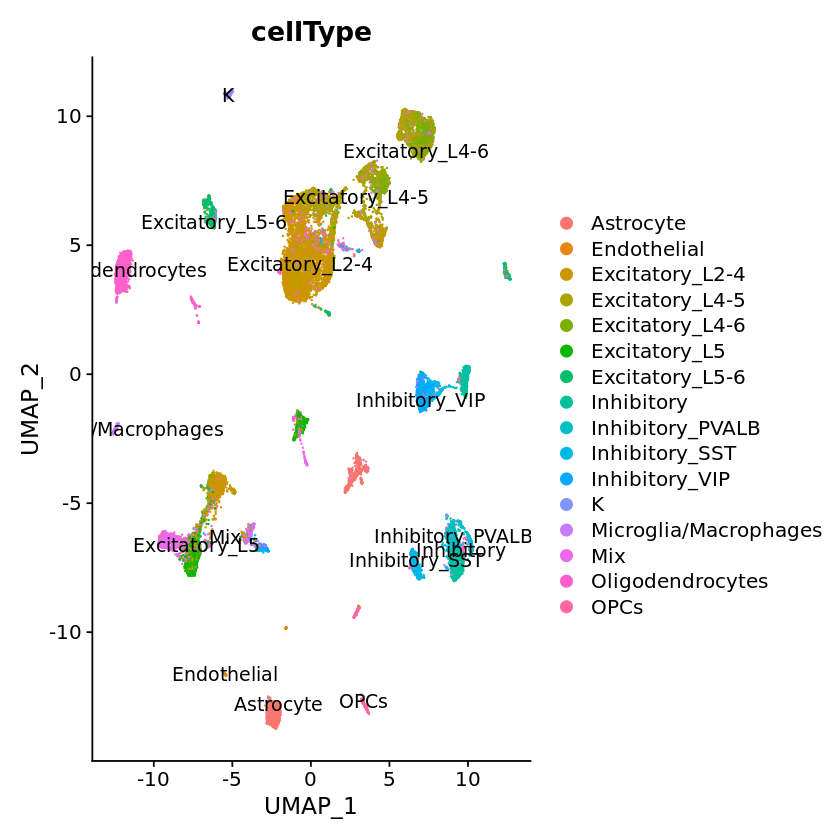

In [147]:
DimPlot(ge_so_control, reduction='umap', group.by='cellType', label=T)
results_root <- '/data/APAproject/post_qual/data/Nagy_mdd/results/'
plotname <- paste0(results_root, 'Nagy_control_map_metadata_added.pdf')
pdf(file=plotname, width = 8.27, height = 11.69, paper='A4r', onefile=T)
DimPlot(ge_so_control, reduction='umap', group.by='cellType', label=T)
dev.off()

In [150]:
ge_so_control$cluster <- ge_so_control$cellType
ge_so_control$cellType <- paste0('Nagy_',ge_so_control$cellType)

In [151]:
saveRDS(ge_so_control, file='rdata/ge_so_control_Nagy.rds')

In [9]:
ge_so_control <- readRDS('rdata/ge_so_control_Nagy.rds')

In [18]:
tmp_df <- data.frame(sampleID = ge_so_control$sample_id,
                     barcodes=paste0(ge_so_control$barcode,'-1'),
                    new_cellnames=paste0(ge_so_control$barcode,'-s',ge_so_control$sample_id))
tmp_df

,sampleID,barcodes,new_cellnames
,<chr>,<chr>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,3,AAACCTGAGGTAGCCA-1,AAACCTGAGGTAGCCA-s3
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,3,AAACCTGCAAACTGTC-1,AAACCTGCAAACTGTC-s3
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,3,AAACCTGCAACAACCT-1,AAACCTGCAACAACCT-s3
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,3,AAACCTGGTCCGAACC-1,AAACCTGGTCCGAACC-s3
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,3,AAACCTGGTCGTGGCT-1,AAACCTGGTCGTGGCT-s3
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,3,AAACGGGAGGAACTGC-1,AAACGGGAGGAACTGC-s3
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,3,AAACGGGAGTGGTAGC-1,AAACGGGAGTGGTAGC-s3
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,3,AAACGGGAGTGTGAAT-1,AAACGGGAGTGTGAAT-s3
Astros_3.3_Control_B3_AAACGGGCATCCAACA,3,AAACGGGCATCCAACA-1,AAACGGGCATCCAACA-s3


In [19]:
## rename the cellnames in the ge_so for conveniece in downstream analysis
ge_so_control <- RenameCells(ge_so_control, new.names = tmp_df$new_cellnames)
Cells(ge_so_control)[10]

[1] "AAACGGGGTATTCGTG-s3"

In [22]:
### save the QCed barcodes for filtering the bamfiles for peak calling
for (sample in unique(ge_so_control$sample_id)){
    tmp <- tmp_df[tmp_df$sampleID==sample,]
    tmp <- tmp['barcodes']
    write.table(tmp, file=paste0('raw_data/bamfiles_in/sample_barcodes',sample,'.tsv'),
                row.names = F, col.names = F, quote=F)
}

In [24]:
table(ge_so_control$sample_id)


  12   13   15   16   19    2   20   21   22   24   25   27   29    3   31    7 
2511 2433 3523 1239 2630 1795 3491 1953 2144 1061  212 1387 2461 1363 3288 2487 
   9 
1234 

In [29]:
ge_so_control <- subset(ge_so_control, subset= sample_id %in% c('12','13','15','16','19','2','20',
                                                               '21','22','27','29','3','31','7','9'))
ge_so_control

An object of class Seurat 
30062 features across 33939 samples within 1 assay 
Active assay: RNA (30062 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

In [30]:
saveRDS(ge_so_control, file='rdata/ge_so_control_Nagy.rds') 

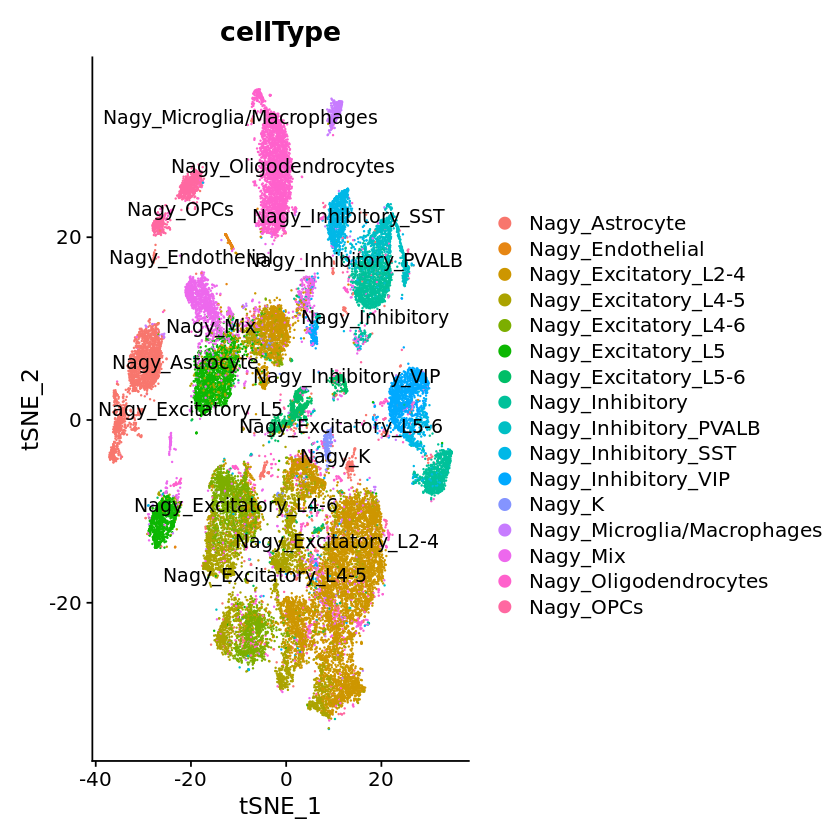

In [32]:
ge_so_control <- RunTSNE(ge_so_control, dims = 1:20, perplexity=200)
DimPlot(ge_so_control, reduction = 'tsne', group.by='cellType',label=T, repel=T)

# next chapter, Nov 17 2021

In [2]:
ge_so <- readRDS('rdata/ge_so_control_Nagy.rds')
ge_so

An object of class Seurat 
30062 features across 33939 samples within 1 assay 
Active assay: RNA (30062 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

[1] FALSE

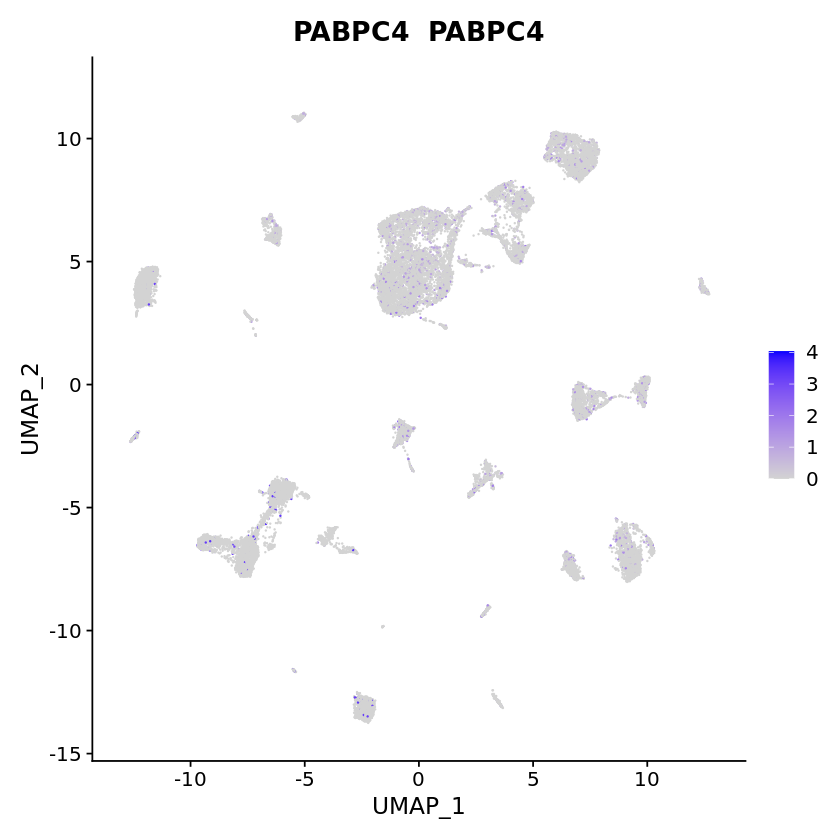

In [16]:
FeaturePlot(ge_so, features = 'PABPC4  PABPC4')
'PABPC4' %in% rownames(ge_so)

In [18]:
###
setwd('/data/APAproject/post_qual/data/control_vs_pathology/')

In [19]:
reference.file <- '/home/aiden/data/refgenome/refdata-gex-GRCh38-2020-A/genes//genes.gtf'
gtf_gr <- rtracklayer::import(reference.file)
gtf_TxDb <- GenomicFeatures::makeTxDbFromGFF(reference.file, format="gtf")
###########
peak.annotations <- read.table("sierra_AD_CTnagy/AD_CTnagy_peaks_annotated.txt", 
                               header = TRUE,
                               sep = "\t",
                               row.names = 1,
                               stringsAsFactors = FALSE)

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



[1] "Creating Seurat object with 347846 peaks and 94638 cells"


Warning message:
"The following arguments are not used: row.names"


In [66]:
ge_so <- readRDS('../Nagy_mdd/rdata/ge_so_control_Nagy.rds')

In [22]:
Cells(ge_so)[10]
## ok correc the barcodes using the bs notebook

[1] "AAACGGGGTATTCGTG-s3"

In [67]:
table(ge_so$cluster)


            Astrocyte           Endothelial       Excitatory_L2-4 
                 2574                   183                  8021 
      Excitatory_L4-5       Excitatory_L4-6         Excitatory_L5 
                 3563                  2279                  2489 
      Excitatory_L5-6            Inhibitory      Inhibitory_PVALB 
                 1273                  2273                   984 
       Inhibitory_SST        Inhibitory_VIP                     K 
                 1311                  1585                   320 
Microglia/Macrophages                   Mix      Oligodendrocytes 
                  528                  2257                  3169 
                 OPCs 
                 1130 

In [68]:
ge_so$main_cellTypes <- 'NA'
IN_idx <- which(ge_so$cluster %in% c('Inhibitory_SST',' Inhibitory_VIP','Inhibitory_VIP',
                                     'Inhibitory','Inhibitory_PVALB'))
ge_so$main_cellTypes[IN_idx] = 'Inhibitory_Neurons'
##
Ex_idx <- which(ge_so$cluster %in% c('Excitatory_L4-5','Excitatory_L5-6','Excitatory_L4-6',
                                     'Excitatory_L5','Excitatory_L2-4'))
ge_so$main_cellTypes[Ex_idx] = 'Excitatory_Neurons'
##
En_idx <- which(ge_so$cluster %in% c('Endothelial'))
ge_so$main_cellTypes[En_idx] = 'Endothelial'
##
Ast_idx <- which(ge_so$cluster %in% c('Astrocyte'))
ge_so$main_cellTypes[Ast_idx] = 'Astrocytes'
##
Mg_idx <- which(ge_so$cluster %in% c('Microglia/Macrophages'))
ge_so$main_cellTypes[Mg_idx] = 'Microglia'
##
Og_idx <- which(ge_so$cluster %in% c('Oligodendrocytes'))
ge_so$main_cellTypes[Og_idx] = 'Oligodendrocytes'

##
OPC_idx <- which(ge_so$cluster %in% c('OPCs'))
ge_so$main_cellTypes[OPC_idx] = 'OPC'

,clusters,main_celltype,cond,cells
,<chr>,<chr>,<chr>,<chr>
AAACCTGAGGTAGCCA-s3,Excitatory_L2-4,Excitatory_Neurons,CT,AAACCTGAGGTAGCCA-s3
AAACCTGCAAACTGTC-s3,Inhibitory,Inhibitory_Neurons,CT,AAACCTGCAAACTGTC-s3
AAACCTGCAACAACCT-s3,Excitatory_L2-4,Excitatory_Neurons,CT,AAACCTGCAACAACCT-s3
AAACCTGGTCCGAACC-s3,Excitatory_L5-6,Excitatory_Neurons,CT,AAACCTGGTCCGAACC-s3
AAACCTGGTCGTGGCT-s3,Inhibitory_VIP,Inhibitory_Neurons,CT,AAACCTGGTCGTGGCT-s3
AAACGGGAGGAACTGC-s3,Mix,NA,CT,AAACGGGAGGAACTGC-s3
AAACGGGAGTGGTAGC-s3,Oligodendrocytes,Oligodendrocytes,CT,AAACGGGAGTGGTAGC-s3
AAACGGGAGTGTGAAT-s3,Excitatory_L4-6,Excitatory_Neurons,CT,AAACGGGAGTGTGAAT-s3
AAACGGGCATCCAACA-s3,Astrocyte,Astrocytes,CT,AAACGGGCATCCAACA-s3


In [32]:
## metadata for AD
# ad_all <- readRDS('../Kapmann/rdata/SFG_all_cells_ge_so_nosfg7.rds')
# AD_meta_data <- data.frame(clusters=ad_all$clusterAssignment,
#                            main_celltype=paste0('AD_',ad_all$clusterCellType))
# AD_meta_data$cond <- 'AD'
# AD_meta_data$cells <- rownames(AD_meta_data)
#AD_meta_data

## metadata for CT
# CT_meta_data <- data.frame(clusters=ge_so$cluster,
#                            main_celltype=ge_so$main_cellTypes)
# CT_meta_data$cond <- 'CT'
# CT_meta_data$cells <- rownames(CT_meta_data)


AD_CT_metadata <- rbind(CT_meta_data,AD_meta_data)
AD_CT_metadata$main_celltype <- plyr::mapvalues(x = AD_CT_metadata$main_celltype,
                                          from = c("AD_Astro", "AD_Endo","AD_Exc",
                                                  "AD_Inh","AD_Micro","AD_Oligo"),
                                          to = c("AD_Astrocytes", "AD_Endothelial",
                                                 "AD_Excitatory_Neurons",
                                                  "AD_Inhibitory_Neurons","AD_Microglia",
                                                 "AD_Oligodendrocytes"))
rownames(AD_CT_metadata) <- AD_CT_metadata$cells

AD_CT_metadata

,clusters,main_celltype,cond,cells
,<chr>,<chr>,<chr>,<chr>
AAACCTGAGGTAGCCA-s3,Excitatory_L2-4,Excitatory_Neurons,CT,AAACCTGAGGTAGCCA-s3
AAACCTGCAAACTGTC-s3,Inhibitory,Inhibitory_Neurons,CT,AAACCTGCAAACTGTC-s3
AAACCTGCAACAACCT-s3,Excitatory_L2-4,Excitatory_Neurons,CT,AAACCTGCAACAACCT-s3
AAACCTGGTCCGAACC-s3,Excitatory_L5-6,Excitatory_Neurons,CT,AAACCTGGTCCGAACC-s3
AAACCTGGTCGTGGCT-s3,Inhibitory_VIP,Inhibitory_Neurons,CT,AAACCTGGTCGTGGCT-s3
AAACGGGAGGAACTGC-s3,Mix,NA,CT,AAACGGGAGGAACTGC-s3
AAACGGGAGTGGTAGC-s3,Oligodendrocytes,Oligodendrocytes,CT,AAACGGGAGTGGTAGC-s3
AAACGGGAGTGTGAAT-s3,Excitatory_L4-6,Excitatory_Neurons,CT,AAACGGGAGTGTGAAT-s3
AAACGGGCATCCAACA-s3,Astrocyte,Astrocytes,CT,AAACGGGCATCCAACA-s3


In [43]:
peak.counts <- ReadPeakCounts(data.dir = "sierra_AD_CTnagy/KapmannAD_CTnagy_Sierra_aggregate/")
AD_CT_all_peaks_so <- NewPeakSeurat(peak.data = peak.counts, 
                              annot.info = peak.annotations, 
                              min.cells = 50, min.peaks = 200)
AD_CT_all_peaks_so

[1] "Creating Seurat object with 347846 peaks and 94638 cells"


Warning message:
"The following arguments are not used: row.names"


[1] "Preparing feature table for DEXSeq"
[1] "No t-SNE coodinates included"
[1] "No UMAP coordinates included"


An object of class Seurat 
341569 features across 94636 samples within 1 assay 
Active assay: RNA (341569 features, 0 variable features)

In [44]:
AD_CT_all_peaks_so$cells <- Cells(AD_CT_all_peaks_so)
AD_CT_all_peaks_so_filtered <- subset(AD_CT_all_peaks_so, subset=cells %in%  AD_CT_metadata$cells)
AD_CT_all_peaks_so_filtered <- AddMetaData(AD_CT_all_peaks_so_filtered, metadata = AD_CT_metadata)
AD_CT_all_peaks_so_filtered

An object of class Seurat 
341569 features across 94636 samples within 1 assay 
Active assay: RNA (341569 features, 0 variable features)

In [45]:
saveRDS(AD_CT_all_peaks_so_filtered, 'rdata/AD_CTnagy_peaks_so_labeled.rds')

In [47]:
table(AD_CT_all_peaks_so_filtered$main_celltype)
AD_CT_all_peaks_so_filtered <- SetIdent(AD_CT_all_peaks_so_filtered,
                                        value = AD_CT_all_peaks_so_filtered$main_celltype)


        AD_Astrocytes        AD_Endothelial AD_Excitatory_Neurons 
                 7911                  1050                 18735 
AD_Inhibitory_Neurons          AD_Microglia   AD_Oligodendrocytes 
                 7603                  4034                 17968 
               AD_OPC            Astrocytes           Endothelial 
                 3396                  2574                   183 
   Excitatory_Neurons    Inhibitory_Neurons             Microglia 
                17625                  6153                   528 
                   NA      Oligodendrocytes                   OPC 
                 2577                  3169                  1130 

[1] "9015 expressed peaks in feature types UTR3"
[1] "8578 peaks after filtering out A-rich annotations"
[1] "2400 genes detected with multiple peak sites expressed"
[1] "6978 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


,genomic_feature(s),population1_pct,population2_pct,pvalue,padj,Log2_fold_change,SiteLocation,NumSites,FC_direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
TUBB3:chr16:89935919-89936087:1,UTR3,0.3481185,0.24119149,0.000000e+00,0.000000e+00,0.9068031,6,6,Up
TUBB3:chr16:89935868-89936120:1,UTR3,0.3586869,0.26916312,0.000000e+00,0.000000e+00,0.7367152,5,6,Up
CALM1:chr14:90407982-90408198:1,UTR3,0.6665065,0.60629787,0.000000e+00,0.000000e+00,0.5183879,14,14,Up
CALM1:chr14:90404697-90405077:1,UTR3,0.2800107,0.24096454,4.779227e-96,9.136834e-95,0.4736801,6,14,Up
CALM1:chr14:90404961-90405753:1,UTR3,0.3569789,0.32760284,8.558956e-87,1.379316e-85,0.4272861,8,14,Up
CALM1:chr14:90404459-90405221:1,UTR3,0.3404857,0.32811348,3.888509e-56,3.978595e-55,0.2958060,5,14,Up
CALM1:chr14:90404785-90405097:1,UTR3,0.1965306,0.18757447,1.284805e-25,7.656167e-25,0.2817796,7,14,Up
SRSF11:chr1:70232039-70237780:1,UTR3,0.2245530,0.07988652,0.000000e+00,0.000000e+00,1.6227711,2,3,Up
SRSF11:chr1:70232031-70250612:1,UTR3,0.3692554,0.16493617,0.000000e+00,0.000000e+00,1.4680934,1,3,Up


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.272637783148674"


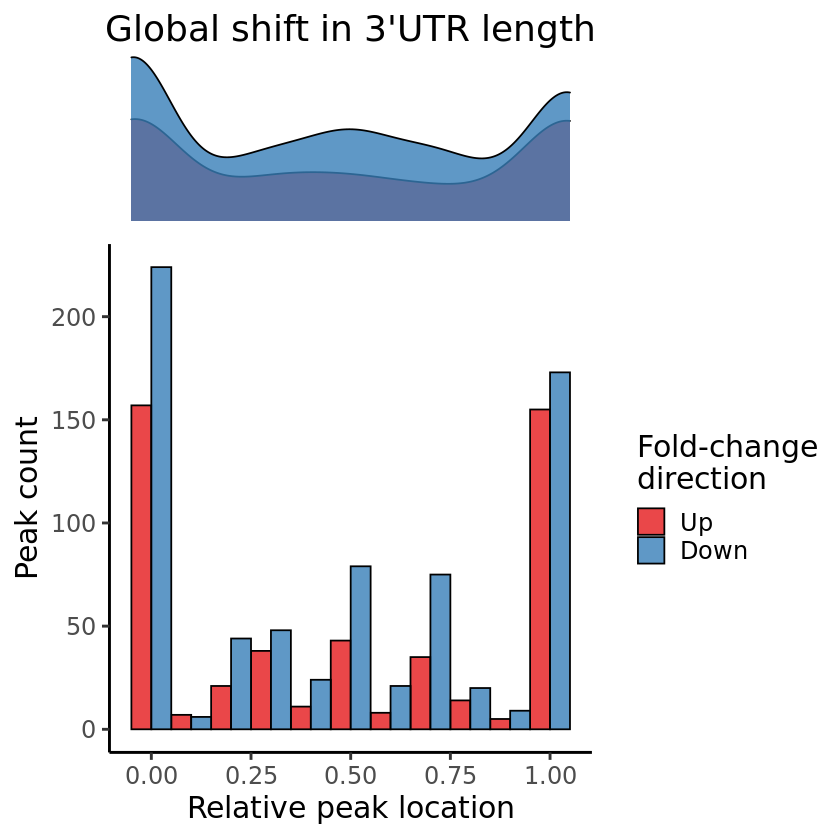

In [48]:
Exc_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_Excitatory_Neurons', 
                                      population.2 = 'Excitatory_Neurons')
Exc_utr_shift_res
PlotUTRLengthShift(Exc_utr_shift_res)

[1] "911 expressed peaks in feature types UTR3"
[1] "871 peaks after filtering out A-rich annotations"
[1] "260 genes detected with multiple peak sites expressed"
[1] "642 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


,genomic_feature(s),population1_pct,population2_pct,pvalue,padj,Log2_fold_change,SiteLocation,NumSites,FC_direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
SAT1:chrX:23783173-23784128:1,UTR3,0.29375310,0.13257576,2.175846e-17,1.396893e-14,1.0551607,1,2,Up
SAT1:chrX:23783597-23784078:1,UTR3,0.15195835,0.06439394,3.062125e-08,2.457355e-06,1.0776844,2,2,Up
PEBP1:chr12:118145059-118145584:1,UTR3,0.09469509,0.15530303,4.039780e-06,1.620962e-04,0.4965750,3,3,Up
CELF2:chr10:11332662-11334366:1,UTR3,0.05453644,0.10606061,3.026180e-05,9.251465e-04,0.5361924,2,2,Up
MAP1B:chr5:72208871-72209565:1,UTR3,0.08081309,0.17992424,4.494915e-04,1.109898e-02,0.2721549,3,3,Up
TMSB10:chr2:84906513-84906671:1,UTR3,0.14551314,0.14015152,5.958470e-04,1.366192e-02,0.4401732,3,3,Up
VSNL1:chr2:17655997-17656561:1,UTR3,0.05304908,0.14393939,2.303719e-03,4.481780e-02,0.4050757,3,3,Up
SAT1:chrX:23785278-23786226:1,UTR3,0.24590977,0.25378788,1.514864e-12,4.862713e-10,-0.7117118,1,2,Down
SAT1:chrX:23785555-23786226:1,UTR3,0.24243927,0.22916667,1.767648e-08,1.621186e-06,-0.5916161,2,2,Down


Warning message in wilcox.test.default(pos.upreg, pos.downreg):
"cannot compute exact p-value with ties"


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.00974141191810233"


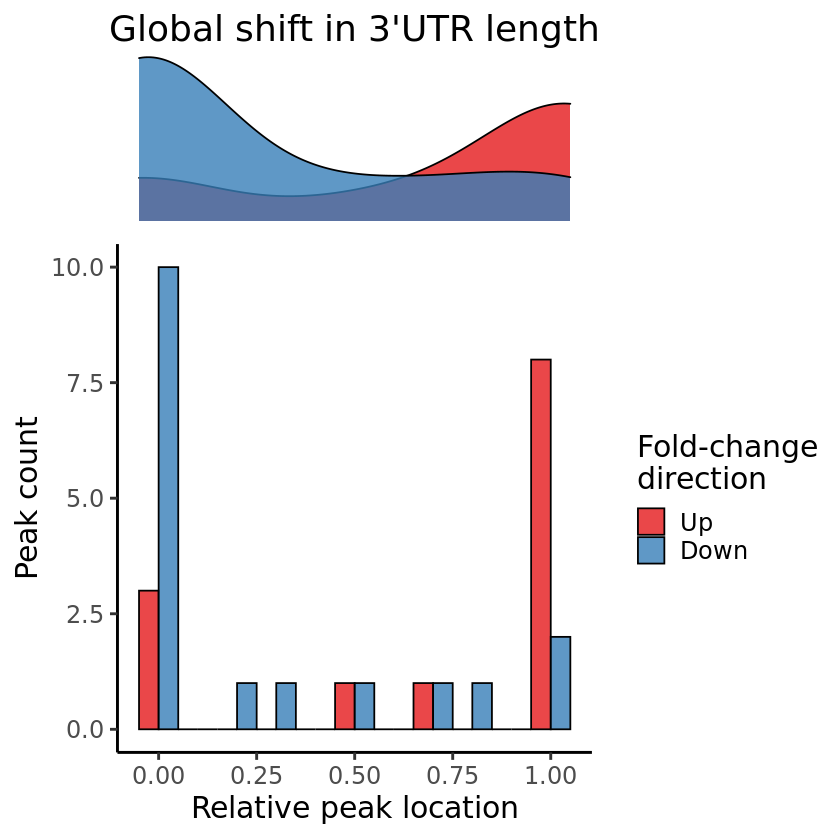

In [49]:
Mg_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_Microglia', 
                                      population.2 = 'Microglia')
Mg_utr_shift_res
PlotUTRLengthShift(Mg_utr_shift_res)

[1] "6942 expressed peaks in feature types UTR3"
[1] "6639 peaks after filtering out A-rich annotations"
[1] "1907 genes detected with multiple peak sites expressed"
[1] "5308 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


,genomic_feature(s),population1_pct,population2_pct,pvalue,padj,Log2_fold_change,SiteLocation,NumSites,FC_direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
PRNP:chr20:4700930-4701590:1,UTR3,0.56411943,0.62798635,0.000000e+00,0.000000e+00,0.5739633,4,4,Up
SNAP25:chr20:10306693-10307418:1,UTR3,0.59989478,0.78807086,0.000000e+00,0.000000e+00,0.6689793,2,5,Up
SRSF11:chr1:70232031-70250612:1,UTR3,0.24503485,0.13651877,2.341834e-197,1.243045e-194,1.4463096,1,2,Up
SRSF11:chr1:70232039-70237780:1,UTR3,0.13336841,0.06273363,5.896648e-67,2.819766e-65,1.6592226,2,2,Up
MAP1B:chr5:72194552-72195612:1,UTR3,0.26634223,0.21371689,6.435793e-183,2.135074e-180,1.4054741,1,2,Up
MAP1B:chr5:72194565-72195066:1,UTR3,0.13297383,0.12855518,1.090707e-43,3.031138e-42,1.0591024,2,2,Up
SLC12A5:chr20:46059490-46060152:1,UTR3,0.34591609,0.48577929,4.433918e-178,1.307513e-175,0.3445824,2,3,Up
TUBB3:chr16:89935919-89936087:1,UTR3,0.26226490,0.21322932,2.182054e-175,5.791171e-173,1.0359750,6,6,Up
TUBB3:chr16:89935868-89936120:1,UTR3,0.27186637,0.24150821,3.889302e-141,7.118763e-139,0.8716668,5,6,Up


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.00067353707455017"


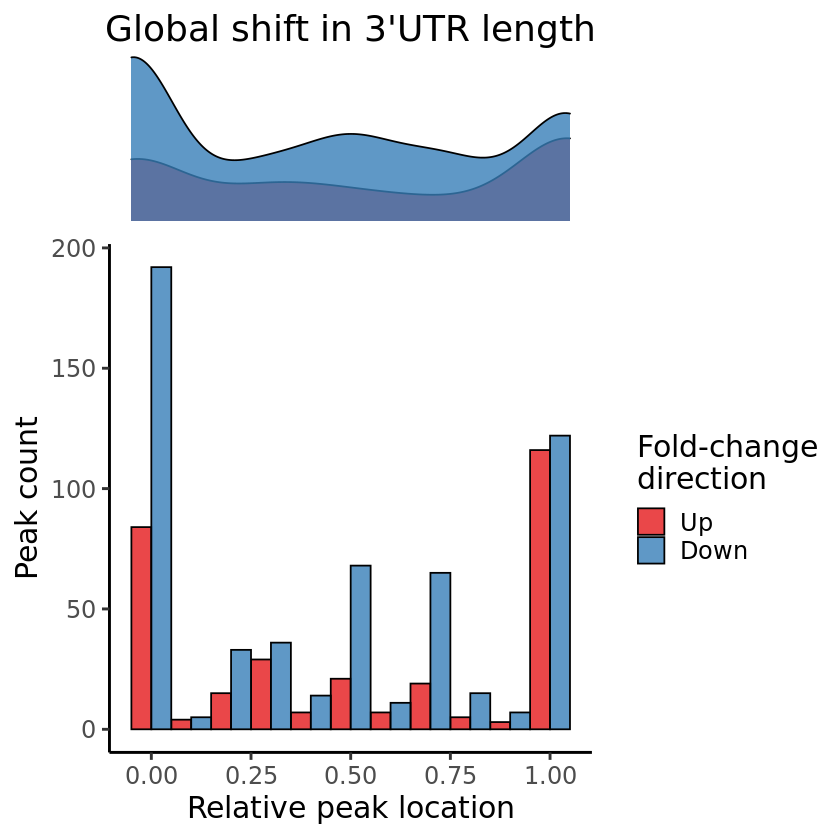

In [50]:
Inh_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_Inhibitory_Neurons', 
                                      population.2 = 'Inhibitory_Neurons')
Inh_utr_shift_res
PlotUTRLengthShift(Inh_utr_shift_res)

[1] "1970 expressed peaks in feature types UTR3"
[1] "1896 peaks after filtering out A-rich annotations"
[1] "561 genes detected with multiple peak sites expressed"
[1] "1468 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


,genomic_feature(s),population1_pct,population2_pct,pvalue,padj,Log2_fold_change,SiteLocation,NumSites,FC_direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
SNAP25:chr20:10306693-10307418:1,UTR3,0.23238095,0.4262295,5.223312e-05,0.0076678222,0.4151476,2,3,Up
LUC7L3:chr17:50751859-50752865:1,UTR3,0.07714286,0.1366120,2.736428e-07,0.0001339026,-1.7983629,1,2,Down
LUC7L3:chr17:50752110-50752788:1,UTR3,0.07714286,0.1311475,2.710949e-06,0.0005685248,-1.6963890,2,2,Down
CALM1:chr14:90407636-90407852:1,UTR3,0.02000000,0.1420765,4.816001e-07,0.0001767472,-1.9945690,11,12,Down
CALM1:chr14:90407407-90407917:1,UTR3,0.04761905,0.1857923,9.118163e-07,0.0002677093,-1.3648459,7,12,Down
CALM1:chr14:90407625-90407781:1,UTR3,0.01333333,0.1038251,3.485891e-06,0.0006396611,-2.2160290,10,12,Down
CALM1:chr14:90407592-90407808:1,UTR3,0.01904762,0.1147541,1.053216e-05,0.0017179124,-1.8782635,9,12,Down
RTN4:chr2:54972187-54972911:-1,UTR3,0.18380952,0.2513661,1.362015e-06,0.0003332396,0.9813012,7,7,Up


Warning message in wilcox.test.default(pos.upreg, pos.downreg):
"cannot compute exact p-value with ties"


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 1"


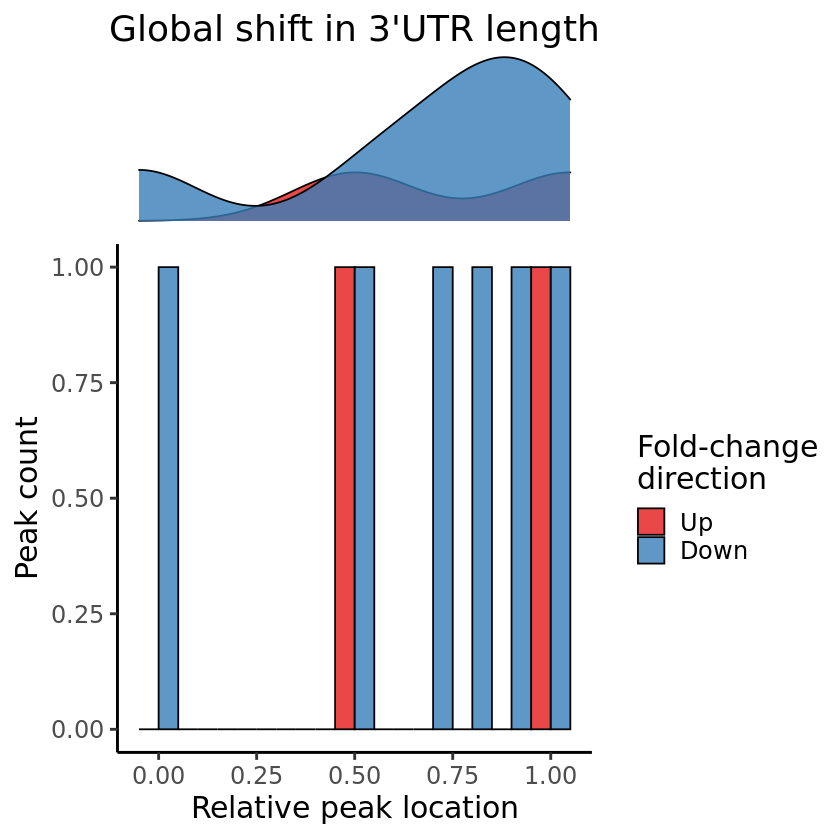

In [51]:
End_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_Endothelial', 
                                      population.2 = 'Endothelial')
End_utr_shift_res
PlotUTRLengthShift(End_utr_shift_res)

[1] "2338 expressed peaks in feature types UTR3"
[1] "2229 peaks after filtering out A-rich annotations"
[1] "635 genes detected with multiple peak sites expressed"
[1] "1621 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


,genomic_feature(s),population1_pct,population2_pct,pvalue,padj,Log2_fold_change,SiteLocation,NumSites,FC_direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
SNAP25:chr20:10306693-10307418:1,UTR3,0.23852863,0.40093240,2.236934e-156,3.626069e-153,0.6523242,2,5,Up
SNRNP70:chr19:49107872-49108605:1,UTR3,0.26785489,0.46581197,1.794125e-73,3.635347e-71,0.3470760,1,3,Up
ID2:chr2:8682175-8683931:1,UTR3,0.17671597,0.11810412,1.899262e-62,3.078704e-60,0.8982714,1,3,Up
ATP1B1:chr1:169132602-169132722:1,UTR3,0.08001517,0.11383061,2.182701e-54,3.216507e-52,1.3575285,5,5,Up
ATP1B1:chr1:169131965-169132722:1,UTR3,0.17570471,0.29875680,5.136657e-36,2.871214e-34,0.4035769,1,5,Up
LUC7L3:chr17:50740335-50745965:1,UTR3,0.29654911,0.08857809,5.685498e-51,5.760120e-49,0.9820993,3,5,Up
LUC7L3:chr17:50743658-50745893:1,UTR3,0.21286816,0.04662005,5.881535e-50,5.296649e-48,1.3851587,4,5,Up
LUC7L3:chr17:50743725-50744849:1,UTR3,0.18607003,0.03807304,1.072870e-44,8.695612e-43,1.4515651,5,5,Up
LUC7L3:chr17:50736973-50745961:1,UTR3,0.32852990,0.11965812,1.224582e-42,9.022946e-41,0.7343991,2,5,Up


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.815149143831452"


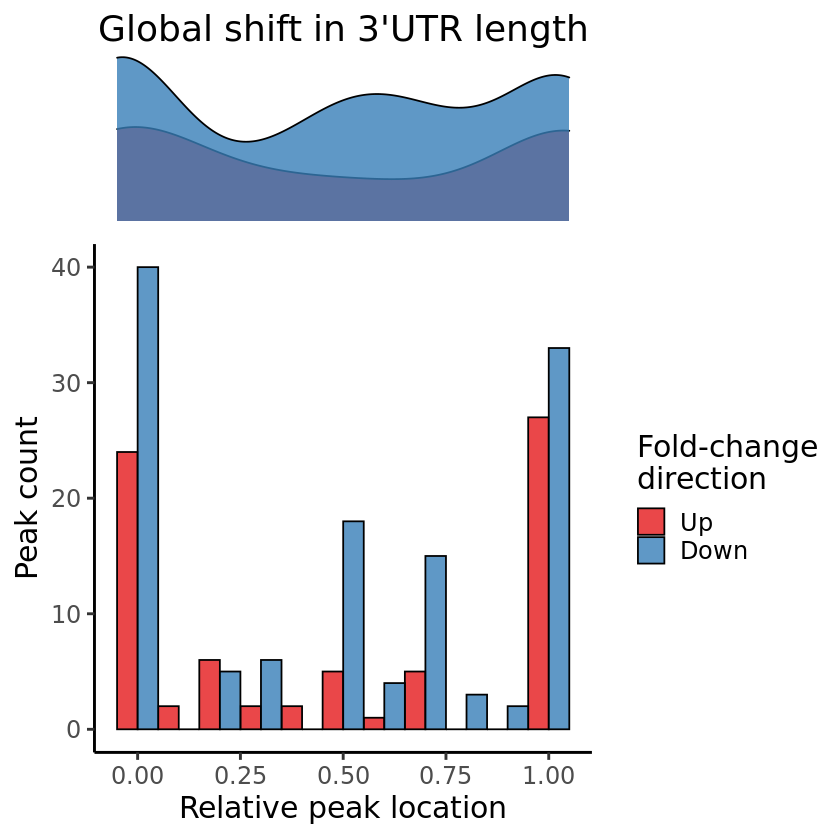

In [52]:
Ast_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_Astrocytes', 
                                      population.2 = 'Astrocytes')
Ast_utr_shift_res
PlotUTRLengthShift(Ast_utr_shift_res)

[1] "1344 expressed peaks in feature types UTR3"
[1] "1271 peaks after filtering out A-rich annotations"
[1] "366 genes detected with multiple peak sites expressed"
[1] "922 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


,genomic_feature(s),population1_pct,population2_pct,pvalue,padj,Log2_fold_change,SiteLocation,NumSites,FC_direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
SNAP25:chr20:10306693-10307418:1,UTR3,0.25706714,0.34513274,2.411437e-40,7.411149e-38,0.4694784,2,4,Up
PRNP:chr20:4700930-4701590:1,UTR3,0.22497055,0.24247788,8.659265e-32,1.995961e-29,0.5016839,3,3,Up
SYT1:chr12:79451337-79452008:1,UTR3,0.14723204,0.25044248,1.635336e-19,1.507779e-17,0.3108209,2,2,Up
EIF4A2:chr3:186789150-186789897:1,UTR3,0.16519435,0.25486726,1.689174e-14,9.161284e-13,0.2791292,1,2,Up
LUC7L3:chr17:50740335-50745965:1,UTR3,0.30771496,0.06637168,2.940537e-14,1.355588e-12,0.9669481,3,5,Up
LUC7L3:chr17:50743658-50745893:1,UTR3,0.22673734,0.04336283,1.246409e-10,3.954675e-09,1.0378067,4,5,Up
LUC7L3:chr17:50743725-50744849:1,UTR3,0.19140165,0.03805310,7.101968e-08,1.522794e-06,0.9456882,5,5,Up
LUC7L3:chr17:50736973-50745961:1,UTR3,0.33951708,0.09911504,9.545516e-08,1.955770e-06,0.5484269,2,5,Up
ATP1B1:chr1:169131965-169132722:1,UTR3,0.16931684,0.24424779,4.325186e-11,1.595129e-09,0.8610198,1,3,Up


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.631575326941724"


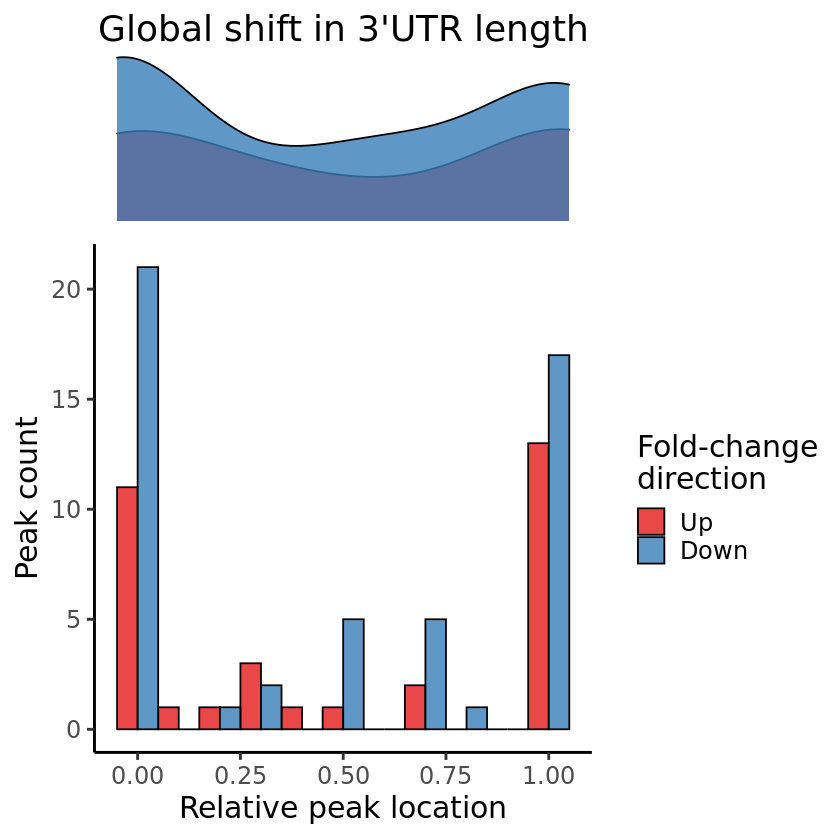

In [53]:
OPC_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_OPC', 
                                      population.2 = 'OPC')
OPC_utr_shift_res
PlotUTRLengthShift(OPC_utr_shift_res)

[1] "1240 expressed peaks in feature types UTR3"
[1] "1177 peaks after filtering out A-rich annotations"
[1] "320 genes detected with multiple peak sites expressed"
[1] "851 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


,genomic_feature(s),population1_pct,population2_pct,pvalue,padj,Log2_fold_change,SiteLocation,NumSites,FC_direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
SLC44A1:chr9:105383130-105438608:1,UTR3,0.77270703,0.60018933,5.177497e-82,3.389269e-80,0.3200304,1,4,Up
SLC44A1:chr9:105393931-105394594:1,UTR3,0.23085485,0.12874724,7.292174e-03,2.807982e-02,0.2595687,4,4,Up
SNAP25:chr20:10306693-10307418:1,UTR3,0.23541852,0.31145472,1.558892e-71,8.291357e-70,0.3200403,2,3,Up
ATP1B1:chr1:169131965-169132722:1,UTR3,0.35496438,0.37298832,2.639192e-58,9.358134e-57,0.3649697,3,8,Up
ATP1B1:chr1:169132602-169132722:1,UTR3,0.13251336,0.11770275,1.040859e-49,3.163469e-48,0.9260554,8,8,Up
ATP1B1:chr1:169129792-169131913:1,UTR3,0.08810107,0.10728937,1.684132e-05,9.187155e-05,0.2986579,2,8,Up
ATP1B1:chr1:169127210-169131895:1,UTR3,0.09450134,0.11675607,9.143224e-05,4.550224e-04,0.2575073,1,8,Up
WSB1:chr17:27312658-27313950:1,UTR3,0.36976848,0.34742821,4.259047e-56,1.394019e-54,0.4086524,3,5,Up
SEPTIN7:chr7:35872558-35880040:1,UTR3,0.23308103,0.14105396,6.530240e-42,1.389309e-40,0.7647267,3,4,Up


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.181523974250803"


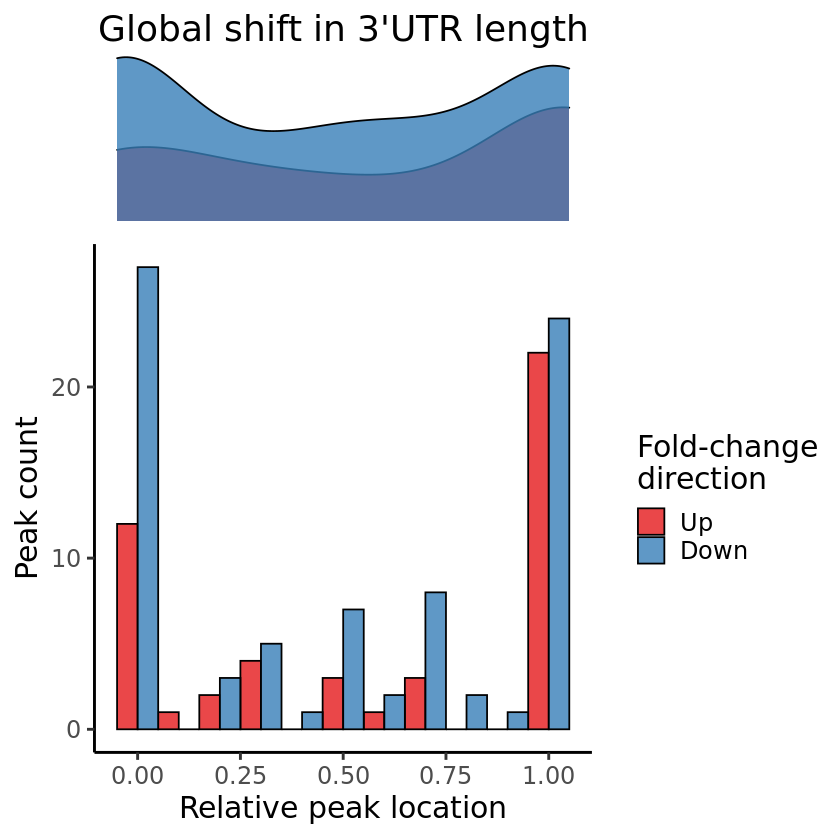

In [54]:
Olig_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_Oligodendrocytes', 
                                      population.2 = 'Oligodendrocytes')
Olig_utr_shift_res
PlotUTRLengthShift(Olig_utr_shift_res)

In [55]:
results <- list(c('AD_Excitatory_Neurons','Exc_utr_shift_res'),
                c('AD_Astrocytes','Ast_utr_shift_res'),
                c('AD_OPC','OPC_utr_shift_res'),
                c('AD_Endothelial','End_utr_shift_res'),
                c('AD_Inhibitory_Neurons','Inh_utr_shift_res'),
                c('AD_Microglia','Mg_utr_shift_res'))

In [58]:
source('/home/aiden/codes/APA_stuff/post_qual/APA/usefull_functions.R')
get_UTR_seqs(results, AD_CT_all_peaks_so_filtered, peak.annotations, gtf_TxDb)

[1] "processing the  AD_Excitatory_Neurons results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were no

[1] "processing the  AD_Astrocytes results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1



[1] "processing the  AD_OPC results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1



[1] "processing the  AD_Endothelial results"


The following `from` values were not present in `x`: 1



[1] "processing the  AD_Inhibitory_Neurons results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not 

[1] "processing the  AD_Microglia results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1



## now run the bedtools getfasta to get the DNA seqs of utr regions
## next you will need to use the python function you wrote to translate to RNA

```
for f in *.bed; do out=${f/.bed/_seqs.fa}; bedtools getfasta -fi ~/data/refgenome/refdata-gex-GRCh38-2020-A/fasta/genome.fa -bed $f -name -fo $out; done
```

````
for f in *.fa; do python dna_to_rna.py $f; done
````

In [59]:
Excitatory_tomtom_res <- toupper(c("CG33714","HNRNPK","HRB87F","KHDRBS3","PCBP2","UNC-75",
                                   "HRB98DE","PABPC3","PF10_0214"))
Inhibitory_tomtom_res <- toupper(c("CG33714","SRSF10","HNRNPA1","HNRNPA1L2","HNRNPA2B1","HRB87F","Nab2p",
                                   "PABPC4","PCBP2","RNP4F","SART3","TARDBP","YBX1","SRSF10","HRB98DE","MSI",
                                   "LARK","CG17838","MUB","SNRNP70K","CG7903","CG7804","RBM5","PABPC1",
                                   "CNOT4","RBM6","PFI1695c","Lm_0212","Tb_0230","Tb_0253","Lm_0254",
                                   "Lm_0255","Tv_0257","Hnrnpr"))
Astrocytes_tomtom_res <- toupper(c("ANKHD1","ARET","TIAR-3","CNOT4","CG5213","PAPI","CPEB2","EXC-7",
                                   "HNRNPC","Hrp1p","HuR","Nab2p","PABPC4","PUM","RBM28","RBM41","SART3",
                                   "TIA1","U2AF2","U2AF50","ZC3H14","PUM","HuR","SXL","FNE","ELAV",
                                   "ORB2","RBP9","ROX8","ENOX1","PABPC1","PABPN1","CPEB4","RALY","TIA1",
                                   "HNRNPCL1","KHDRBS1","SHEP","ETR-1","MAL8P1.40","PF13_0315","PFI1435w",
                                   "Lm_0212","Tb_0217","Tb_0220","Pp_0228","Pp_0229","Smp_067420","Tv_0236",
                                   "RBM45","HNRNPAB","Tb_0252","Tb_0253","Lm_0255","TIAR-1","Tv_0257",
                                   "Tv_0258","Ot_0262","PTBP1","ARET","SRP54","HuR","Syncrip","Hnrnpr"))

In [60]:
AD_ge_so <- readRDS('../Kapmann/rdata/SFG_all_cells_ge_so_nosfg7.rds')
AD_ge_so_exc <- readRDS('../Kapmann/rdata/ge_celltypes_Sos/SFG_Exc_ge.rds')
AD_ge_so_inh <- readRDS('../Kapmann/rdata/ge_celltypes_Sos/SFG_Inh_ge.rds')
AD_ge_so_olg <- readRDS('../Kapmann/rdata/ge_celltypes_Sos/SFG_Oligo_ge.rds')
AD_ge_so_ast <- readRDS('../Kapmann/rdata/ge_celltypes_Sos/SFG_Astro_ge.rds')
AD_ge_so_end <- subset(AD_ge_so, subset= clusterCellType =='Endo')
AD_ge_so_end$cond <- 'ad'
AD_ge_so_end <- SetIdent(AD_ge_so_end, value = AD_ge_so_end$cond)
AD_ge_so_OPC <- subset(AD_ge_so, subset= clusterCellType =='OPC')
AD_ge_so_OPC$cond <- 'ad'
AD_ge_so_OPC <- SetIdent(AD_ge_so_OPC, value = AD_ge_so_OPC$cond)

In [69]:
ge_so$cond <- 'ct'
ge_so <- SetIdent(ge_so, value = ge_so$cond)
ge_so_Inh <- subset(ge_so, subset= main_cellTypes =='Inhibitory_Neurons')
ge_so_Olg <- subset(ge_so, subset= main_cellTypes =='Oligodendrocytes')
ge_so_Ast <- subset(ge_so, subset= main_cellTypes =='Astrocytes')
ge_so_OPC <- subset(ge_so, subset= main_cellTypes =='OPC')
ge_so_End <- subset(ge_so, subset= main_cellTypes =='Endothelial')
ge_so_Exc <- subset(ge_so, subset= main_cellTypes =='Excitatory_Neurons')

In [70]:
rownames(ge_so_Exc)[10]

[1] "RP5-857K21.4  RP5-857K21.4"

In [154]:
changefeuturestrings <- function(genename){
    out <- paste(c(genename,genename), collapse='  ')
    return(out)
}
calcNagy_avg_exp <- function(so,features){
    genes <- lapply(X = features, FUN = changefeuturestrings)
    tmp_df <- data.frame(AverageExpression(so, features = unlist(genes)))
    rownames(tmp_df) <- str_split(rownames(tmp_df), pattern = '  ', n = 2, simplify = T)[,1]
    return(tmp_df)
}
calcNagy_avg_exp(ge_so_Ast,Astrocytes_tomtom_res)

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

Warning message:
"The following 35 features were not found in the RNA assay: ARET  ARET, TIAR-3  TIAR-3, CG5213  CG5213, PAPI  PAPI, EXC-7  EXC-7, HRP1P  HRP1P, HUR  HUR, NAB2P  NAB2P, PUM  PUM, U2AF50  U2AF50, SXL  SXL, FNE  FNE, ELAV  ELAV, ORB2  ORB2, RBP9  RBP9, ROX8  ROX8, SHEP  SHEP, ETR-1  ETR-1, MAL8P1.40  MAL8P1.40, PF13_0315  PF13_0315, PFI1435W  PFI1435W, LM_0212  LM_0212, TB_0217  TB_0217, TB_0220  TB_0220, PP_0228  PP_0228, PP_0229  PP_0229, SMP_067420  SMP_067420, TV_0236  TV_0236, TB_0252  TB_0252, TB_0253  TB_0253, LM_0255  LM_0255, TIAR-1  TIAR-1, TV_0257  TV_0257, TV_0258  TV_0258, OT_0262  OT_0262"


,all
,<dbl>
ANKHD1,0.000000000
CNOT4,1.080113926
CPEB2,1.014492085
HNRNPC,0.874087551
PABPC4,0.374884686
RBM28,0.583721224
RBM41,0.310329788
SART3,0.314001338
TIA1,0.000000000


In [158]:
calculate_lfc_CTvsAD <- function(ct_so, ad_so, features){
    ad_rbp <- as.data.frame(AverageExpression(ad_so, features = features ))
    ct_rbp <- calcNagy_avg_exp(ct_so,features)
    rbp_lfc <- as.data.frame(log(as.numeric(ct_rbp$all)/as.numeric(ad_rbp$all), base = 2))
    rownames(rbp_lfc) <-  rownames(ct_rbp)
    return(rbp_lfc)
}


In [159]:
ast_rbp_exp <- calculate_lfc_CTvsAD(ge_so_Ast, AD_ge_so_ast, Astrocytes_tomtom_res)
ast_rbp_exp

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

Warning message:
"The following 35 features were not found in the originalexp assay: ARET, TIAR-3, CG5213, PAPI, EXC-7, HRP1P, HUR, NAB2P, PUM, U2AF50, SXL, FNE, ELAV, ORB2, RBP9, ROX8, SHEP, ETR-1, MAL8P1.40, PF13_0315, PFI1435W, LM_0212, TB_0217, TB_0220, PP_0228, PP_0229, SMP_067420, TV_0236, TB_0252, TB_0253, LM_0255, TIAR-1, TV_0257, TV_0258, OT_0262"
The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

Warning message:
"The following 35 features were not found in the RNA assay: ARET  ARET, TIAR-3  TIAR-3, CG5213  CG5213, PAPI  PAPI, EXC-7  EXC-7, HRP1P  HRP1P, HUR  HUR, NAB2P  NAB2P, PUM  PUM, U2AF50  U2AF50, SXL  SXL, FNE  FNE, ELAV  ELAV, ORB2  ORB2, RBP9  RBP9, ROX8  ROX8, SHEP  SHEP, ETR-1  ETR-1, MAL8P1.40  MAL8P1.40, PF13_0315  PF13_0315, PF

,"log(as.numeric(ct_rbp$all)/as.numeric(ad_rbp$all), base = 2)"
,<dbl>
ANKHD1,NaN
CNOT4,0.125872791
CPEB2,0.496893322
HNRNPC,0.292910409
PABPC4,-0.400108716
RBM28,-0.027022905
RBM41,0.006568844
SART3,-0.019529661
TIA1,NaN


In [160]:
Exc_rbp_exp <- calculate_lfc_CTvsAD(ge_so_Exc, AD_ge_so_exc, Excitatory_tomtom_res)
Exc_rbp_exp

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

Warning message:
"The following 5 features were not found in the originalexp assay: CG33714, HRB87F, UNC-75, HRB98DE, PF10_0214"
The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

Warning message:
"The following 5 features were not found in the RNA assay: CG33714  CG33714, HRB87F  HRB87F, UNC-75  UNC-75, HRB98DE  HRB98DE, PF10_0214  PF10_0214"


,"log(as.numeric(ct_rbp$all)/as.numeric(ad_rbp$all), base = 2)"
,<dbl>
HNRNPK,0.6919294
KHDRBS3,0.0216588
PCBP2,0.3986493
PABPC3,-0.4902704


In [161]:
Inh_rbp_exp <- calculate_lfc_CTvsAD(ge_so_Inh, AD_ge_so_inh, Inhibitory_tomtom_res)
Inh_rbp_exp

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

Warning message:
"The following 19 features were not found in the originalexp assay: CG33714, HRB87F, NAB2P, RNP4F, HRB98DE, MSI, LARK, CG17838, MUB, SNRNP70K, CG7903, CG7804, PFI1695C, LM_0212, TB_0230, TB_0253, LM_0254, LM_0255, TV_0257"
The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

Warning message:
"The following 19 features were not found in the RNA assay: CG33714  CG33714, HRB87F  HRB87F, NAB2P  NAB2P, RNP4F  RNP4F, HRB98DE  HRB98DE, MSI  MSI, LARK  LARK, CG17838  CG17838, MUB  MUB, SNRNP70K  SNRNP70K, CG7903  CG7903, CG7804  CG7804, PFI1695C  PFI1695C, LM_0212  LM_0212, TB_0230  TB_0230, TB_0253  TB_0253, LM_0254  LM_0254, LM_0255  LM_0255, TV_0257  TV_0257"


,"log(as.numeric(ct_rbp$all)/as.numeric(ad_rbp$all), base = 2)"
,<dbl>
SRSF10,0.42169480
HNRNPA1,0.25772677
HNRNPA1L2,0.78460164
HNRNPA2B1,0.70472513
PABPC4,-0.11348394
PCBP2,0.23560863
SART3,-0.16188068
TARDBP,-1.09846764
YBX1,0.88070046


## Ok lets check the longer seqs in Control :/ 

[1] "9015 expressed peaks in feature types UTR3"
[1] "8578 peaks after filtering out A-rich annotations"
[1] "2400 genes detected with multiple peak sites expressed"
[1] "6978 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


,genomic_feature(s),population1_pct,population2_pct,pvalue,padj,Log2_fold_change,SiteLocation,NumSites,FC_direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
TUBB3:chr16:89935527-89935737:1,UTR3,0.2212766,0.08299973,0.000000e+00,0.000000e+00,1.7435999,4,6,Up
TUBB3:chr16:89935300-89935684:1,UTR3,0.1945532,0.06570590,0.000000e+00,0.000000e+00,1.9114881,1,6,Up
TUBB3:chr16:89935509-89935665:1,UTR3,0.1767376,0.05860689,0.000000e+00,0.000000e+00,1.9198633,3,6,Up
BASP1:chr5:17276038-17276332:1,UTR3,0.3946099,0.23229250,0.000000e+00,0.000000e+00,0.9482947,2,3,Up
LUC7L3:chr17:50751859-50752865:1,UTR3,0.2970213,0.24478249,0.000000e+00,0.000000e+00,2.1351659,2,3,Up
LUC7L3:chr17:50752110-50752788:1,UTR3,0.2767092,0.23714972,0.000000e+00,0.000000e+00,2.0544082,3,3,Up
LUC7L3:chr17:50751845-50752277:1,UTR3,0.1364539,0.06122231,0.000000e+00,0.000000e+00,3.0842165,1,3,Up
SNAP25:chr20:10306558-10307033:1,UTR3,0.6342695,0.36829464,0.000000e+00,0.000000e+00,0.2695480,1,5,Up
SNAP25:chr20:10306779-10306971:1,UTR3,0.4412482,0.18441420,0.000000e+00,0.000000e+00,0.5832948,5,5,Up


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.166444010353859"


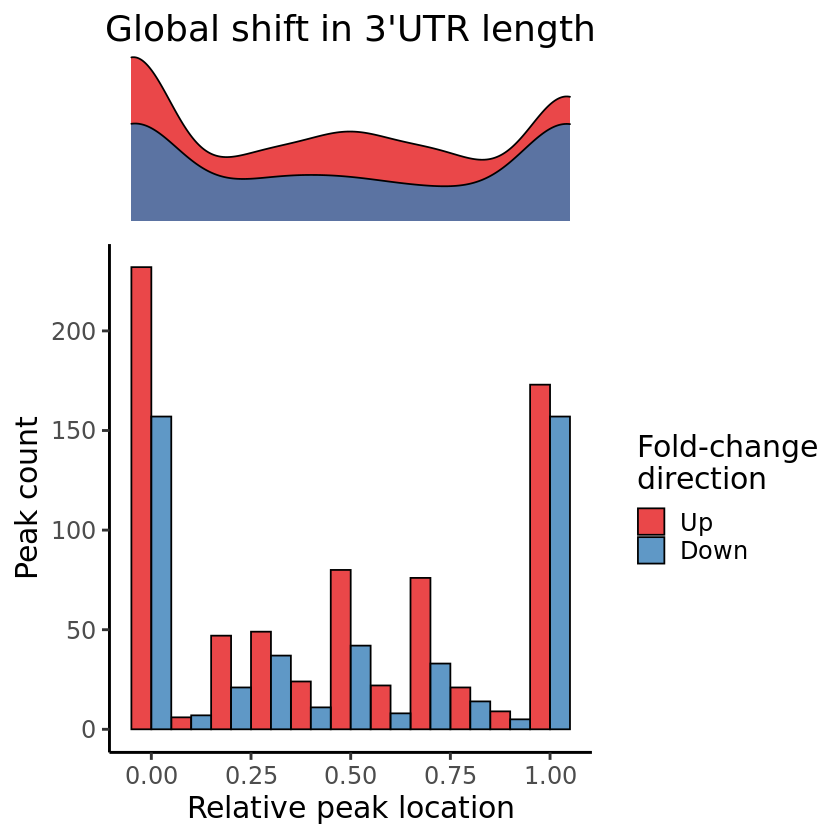

In [162]:
Exc_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'Excitatory_Neurons', 
                                      population.2 = 'AD_Excitatory_Neurons')
Exc_utr_shift_res
PlotUTRLengthShift(Exc_utr_shift_res)

[1] "6942 expressed peaks in feature types UTR3"
[1] "6639 peaks after filtering out A-rich annotations"
[1] "1907 genes detected with multiple peak sites expressed"
[1] "5308 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


,genomic_feature(s),population1_pct,population2_pct,pvalue,padj,Log2_fold_change,SiteLocation,NumSites,FC_direction
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
LUC7L3:chr17:50751859-50752865:1,UTR3,0.3196815,0.17808760,0.000000e+00,0.000000e+00,2.2851266,2,3,Up
LUC7L3:chr17:50752110-50752788:1,UTR3,0.2964408,0.17059056,0.000000e+00,0.000000e+00,2.1926224,3,3,Up
LUC7L3:chr17:50751845-50752277:1,UTR3,0.1607346,0.04300934,0.000000e+00,0.000000e+00,3.3711784,1,3,Up
ATP1B1:chr1:169132016-169132231:1,UTR3,0.3780270,0.09088518,2.296572e-213,1.354467e-210,1.2428473,6,10,Up
ATP1B1:chr1:169132128-169132266:1,UTR3,0.4508370,0.13271077,2.212718e-192,7.340693e-190,0.9072039,7,10,Up
ATP1B1:chr1:169132015-169132327:1,UTR3,0.6128718,0.24122057,4.336417e-170,1.000770e-167,0.5393262,5,10,Up
ATP1B1:chr1:169132180-169132270:1,UTR3,0.4389729,0.13442062,1.301499e-145,2.558650e-143,0.7745274,9,10,Up
ATP1B1:chr1:169132156-169132324:1,UTR3,0.5881684,0.22819939,1.330041e-137,2.353285e-135,0.4846002,8,10,Up
ATP6V0C:chr16:2519291-2519845:1,UTR3,0.3518609,0.07247139,5.508712e-200,2.436687e-197,1.5899660,2,5,Up


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.000230263742106067"


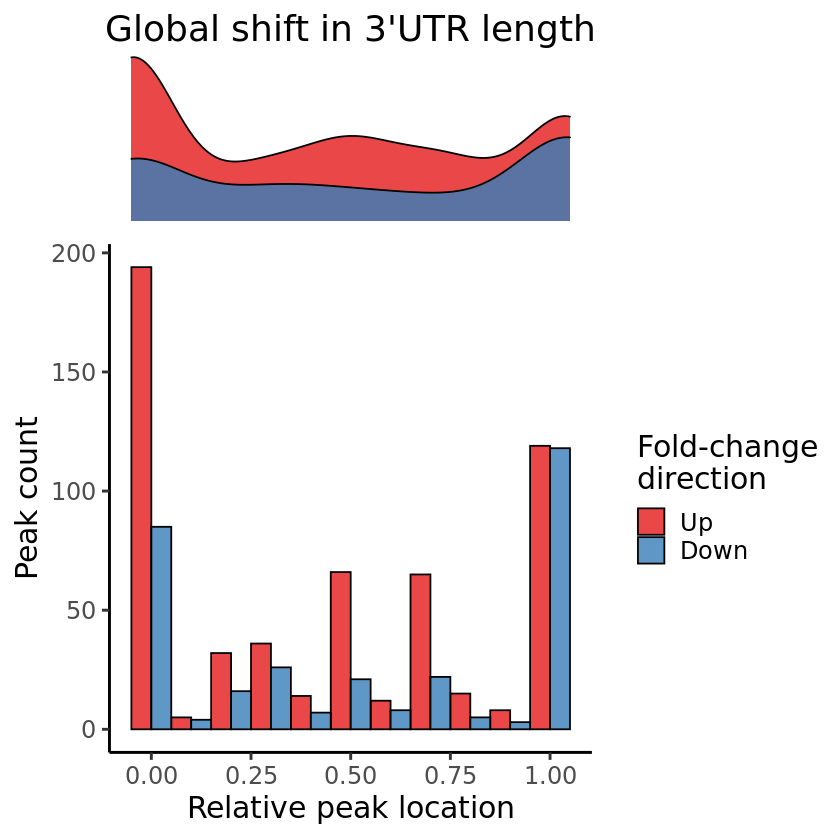

In [163]:
Inh_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'Inhibitory_Neurons', 
                                      population.2 = 'AD_Inhibitory_Neurons')
Inh_utr_shift_res
PlotUTRLengthShift(Inh_utr_shift_res)

In [164]:
results <- list(c('Excitatory_Neurons','Exc_utr_shift_res'),
                c('Inhibitory_Neurons','Inh_utr_shift_res'))
source('/home/aiden/codes/APA_stuff/post_qual/APA/usefull_functions.R')
get_UTR_seqs(results, AD_CT_all_peaks_so_filtered, peak.annotations, gtf_TxDb)

[1] "processing the  Excitatory_Neurons results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not

[1] "processing the  Inhibitory_Neurons results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not

In [165]:
## CT vs AD RBPs that bind Cis elements
Inhibitory_tomtom_res <- toupper(c("TIAR-3","CNOT4","CG33714","CPEB2","FMR1","HNRNPC","HNRNPL","HRB87F",
                                   "HuR","IGF2BP2","Nab2p","PABPC4","PCBP2","PPRC1","QKI","RBM38","RBM4",
                                   "SART3","SRSF9","SM","TIA1","U2AF2","U2AF50","ZC3H14","HNRNPL","HRB98DE",
                                   "MSI","SRSF1","HuR","RBM4","HuR","HOW","SXL","ELAV","BRU-3","LARK","RBP9",
                                   "CPO","B52","HuR","CG7903","CG7804","ENOX1","ESRP2","PABPC1","CPEB4","RALY",
                                   "HNRNPH2","TIA1","HNRNPCL1","KHDRBS1","PABPC5","IGF2BP3","HNRPLL","ETR-1",
                                   "KHDRBS2","BRUNOL6","MAL8P1.40","PFI1435w","Tp_0225","Pp_0228","Pp_0229",
                                   "Smp_067420","Tv_0236","Tb_0251","Tb_0253","Lm_0255","TIAR-1","Tv_0257",
                                   "Tv_0258","Ot_0262","PTBP1","HuR","Nv_0278","Rbm38","Rbm24","Hnrnpr"))
Excitatory_tomtom_res <- toupper(c("TIAR-3","CG33714","CPEB2","HNRNPC","HNRNPK","HRB87F","HuR","LIN28A",
                                   "MSI","Nab2p","PABPC4","RBM5","SART3","SF2","SRSF2","TIA1","TRA2",
                                   "U2AF2","U2AF50","ZC3H14","HRB98DE","MSI","SRSF1","HuR","SXL","ELAV",
                                   "B52","HuR","RBM5","PABPC1","CNOT4","CPEB4","RALY","HNRNPH2","LIN28A",
                                   "SRSF1","ZNF638","TIA1","HNRNPCL1","PFI1435w","Pp_0228","Pp_0229","Smp_067420",
                                   "Tv_0236","Pp_0237","NCU02404","PF10_0214","Tb_0252","Tb_0253","Lm_0255","TIAR-1",
                                   "Tv_0257","Tv_0258","Ot_0262","PTBP1","SRP54","HuR","Rbm42","An_0287","Hnrnpr"))

In [166]:
Exc_ct_rbp_exp <- calculate_lfc_CTvsAD(ge_so_Exc, AD_ge_so_exc, Excitatory_tomtom_res)
Exc_ct_rbp_exp
Exc_rbp_exp

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

Warning message:
"The following 29 features were not found in the originalexp assay: TIAR-3, CG33714, HRB87F, HUR, MSI, NAB2P, SF2, TRA2, U2AF50, HRB98DE, SXL, ELAV, B52, PFI1435W, PP_0228, PP_0229, SMP_067420, TV_0236, PP_0237, NCU02404, PF10_0214, TB_0252, TB_0253, LM_0255, TIAR-1, TV_0257, TV_0258, OT_0262, AN_0287"
The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

Warning message:
"The following 29 features were not found in the RNA assay: TIAR-3  TIAR-3, CG33714  CG33714, HRB87F  HRB87F, HUR  HUR, MSI  MSI, NAB2P  NAB2P, SF2  SF2, TRA2  TRA2, U2AF50  U2AF50, HRB98DE  HRB98DE, SXL  SXL, ELAV  ELAV, B52  B52, PFI1435W  PFI1435W, PP_0228  PP_0228, PP_0229  PP_0229, SMP_067420  SMP_067420, TV_0236  TV_0236, PP_0237  PP_0237, NCU02404  NCU02404, PF10

,"log(as.numeric(ct_rbp$all)/as.numeric(ad_rbp$all), base = 2)"
,<dbl>
CPEB2,0.761203870
HNRNPC,0.380311532
HNRNPK,0.691929358
LIN28A,-1.117236248
PABPC4,0.164783993
RBM5,0.592740188
SART3,-0.007951964
SRSF2,0.644002885
TIA1,-2.059547269


,"log(as.numeric(ct_rbp$all)/as.numeric(ad_rbp$all), base = 2)"
,<dbl>
HNRNPK,0.6919294
KHDRBS3,0.0216588
PCBP2,0.3986493
PABPC3,-0.4902704


In [170]:
Inh_ct_rbp_exp <- calculate_lfc_CTvsAD(ge_so_Inh, AD_ge_so_inh, Inhibitory_tomtom_res)
Inh_ct_rbp_exp 
Inh_rbp_exp

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

Warning message:
"The following 36 features were not found in the originalexp assay: TIAR-3, CG33714, HRB87F, HUR, NAB2P, SM, U2AF50, HRB98DE, MSI, HOW, SXL, ELAV, BRU-3, LARK, RBP9, B52, CG7903, CG7804, HNRPLL, ETR-1, BRUNOL6, MAL8P1.40, PFI1435W, TP_0225, PP_0228, PP_0229, SMP_067420, TV_0236, TB_0251, TB_0253, LM_0255, TIAR-1, TV_0257, TV_0258, OT_0262, NV_0278"
The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

Warning message:
"The following 36 features were not found in the RNA assay: TIAR-3  TIAR-3, CG33714  CG33714, HRB87F  HRB87F, HUR  HUR, NAB2P  NAB2P, SM  SM, U2AF50  U2AF50, HRB98DE  HRB98DE, MSI  MSI, HOW  HOW, SXL  SXL, ELAV  ELAV, BRU-3  BRU-3, LARK  LARK, RBP9  RBP9, B52  B52, CG7903  CG7903, CG7804  CG7804, HNRPLL  HNRPLL, ETR-1  ETR-

,"log(as.numeric(ct_rbp$all)/as.numeric(ad_rbp$all), base = 2)"
,<dbl>
CNOT4,0.06419561
CPEB2,0.68969858
FMR1,0.46803209
HNRNPC,0.26764143
HNRNPL,-1.16786999
IGF2BP2,-0.47235508
PABPC4,-0.11348394
PCBP2,0.23560863
PPRC1,0.34744678


,"log(as.numeric(ct_rbp$all)/as.numeric(ad_rbp$all), base = 2)"
,<dbl>
SRSF10,0.42169480
HNRNPA1,0.25772677
HNRNPA1L2,0.78460164
HNRNPA2B1,0.70472513
PABPC4,-0.11348394
PCBP2,0.23560863
SART3,-0.16188068
TARDBP,-1.09846764
YBX1,0.88070046
